In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
from pacological.hh import exp, gain
from convenience.numpy import save_hdfz, load_hdfz

Starting simulation for duration 5. s
0.59266 s (11%) simulated in 10s, estimated 1m 14s remaining.
1.18398 s (23%) simulated in 20s, estimated 1m 4s remaining.
1.77599 s (35%) simulated in 30s, estimated 54s remaining.
2.36745 s (47%) simulated in 40s, estimated 44s remaining.
2.96084 s (59%) simulated in 50s, estimated 34s remaining.
3.55045 s (71%) simulated in 1m 0s, estimated 24s remaining.
4.14025 s (82%) simulated in 1m 10s, estimated 15s remaining.
4.73169 s (94%) simulated in 1m 20s, estimated 5s remaining.
5. s (100%) simulated in 1m 24s


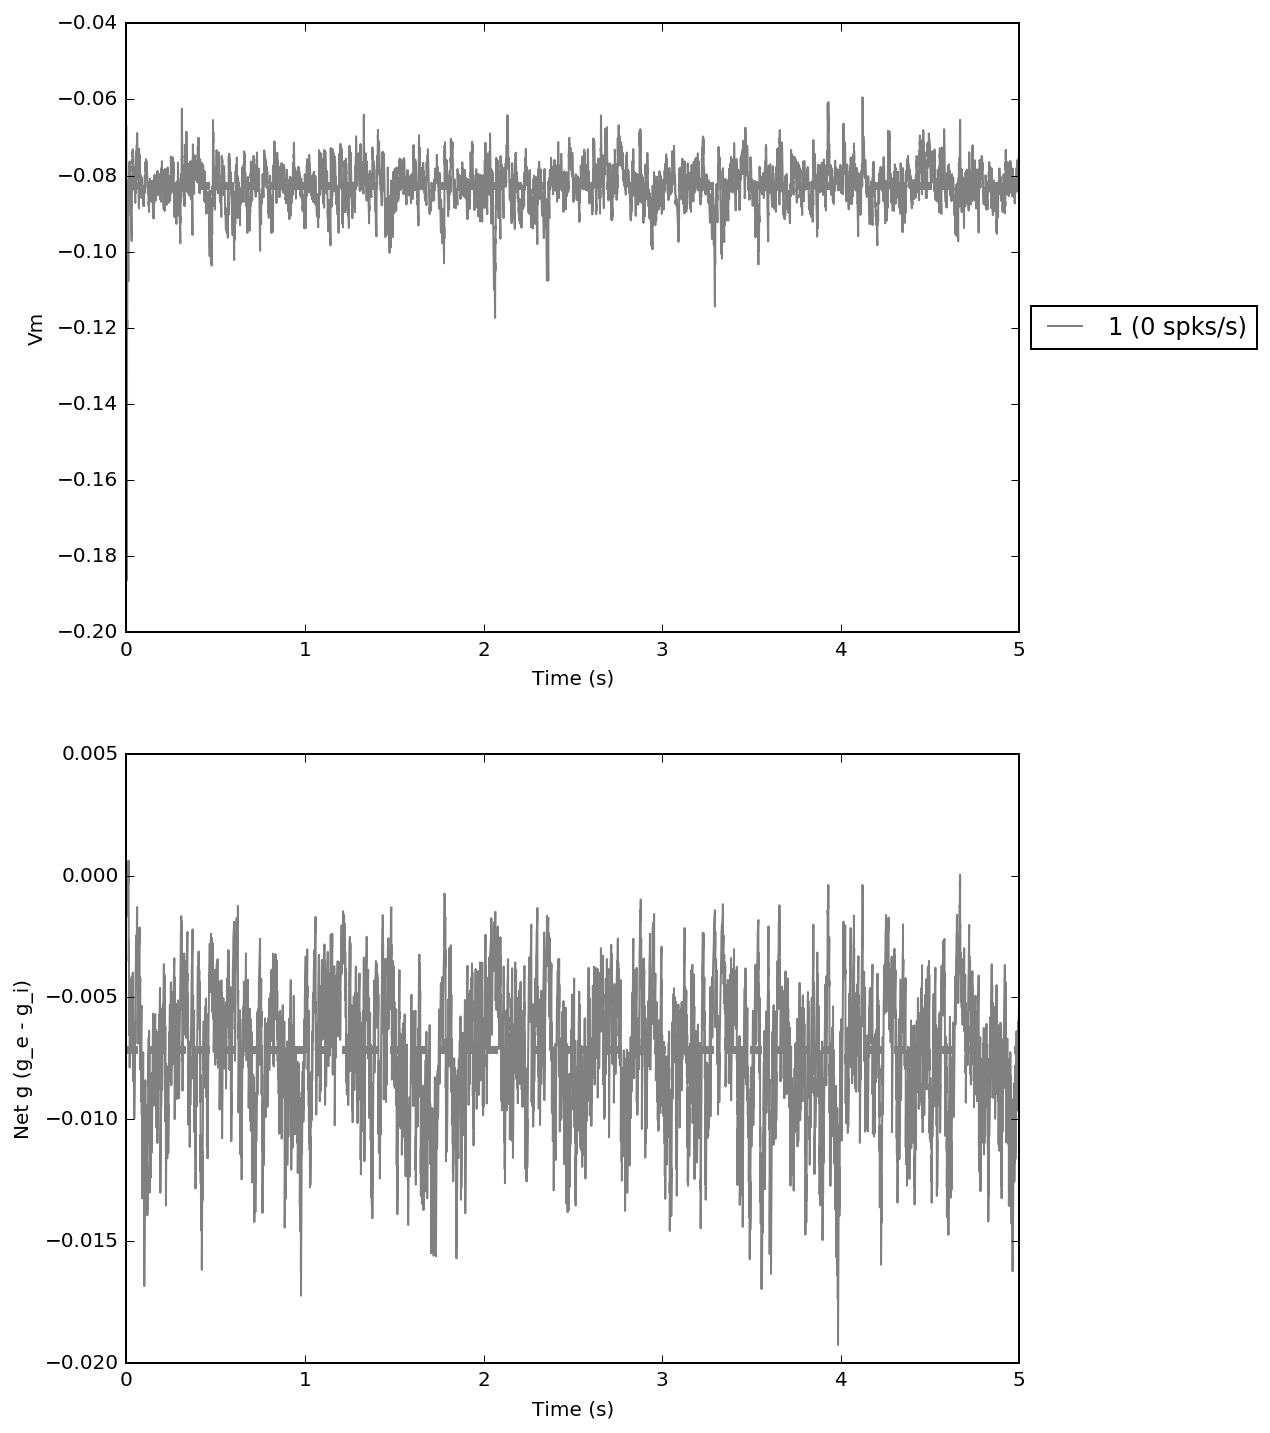

In [20]:
w_m = 0
I = -100

# --
t = 5
r = 400
w = 100
k = 5

res1 = gain(
    t,                                                                     
    r_e=r,                                                                 
    r_i=r,                                                                 
    w_e=k * w,                                                             
    w_i=k * w * 4,                                                         
    w_m=w_m,                                                               
    I_drive=I,                              
    f=0
)

spikes1 = res1['spikes']
traces1 = res1['traces']

tot_g1 = traces1.g_e_[0] - traces1.g_i_[0]
rate1 = spikes1.t_[:].shape[0] / t

n_plot = 2
plt.figure(figsize=(8, 12))
plt.subplot(n_plot, 1, 1)
plt.plot(traces1.t_, traces1.V_[0], 'grey', label='1 ({} spks/s)'.format(rate1))
plt.axhline(y=np.mean(traces1.V_[0]), color='grey', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
# plt.ylim(-0.08, -.030)
plt.ylabel('Vm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(n_plot, 1, 2)
plt.plot(traces1.t_, tot_g1, 'grey', label='1')
plt.axhline(y=np.mean(tot_g1), color='grey', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Net g (g_e - g_i)')